In [2]:
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
from glob import glob 
import os

root = '/export/home1/220824/'
z_scale = 1.06/50

mice = {'A':['AA_*', 'BA_*_R'], 'B':['BB_*', 'BA_*_L'], 'C':['CC_*', 'DC_*_R'], 'D':['DD_*', 'DC_*_L']}
opt_th = {'A':[27.3, 26.4], 'B':[30.4, 26.4], 'C':[25.9, 36.6], 'D':[37.8, 36.6]}

A min: 20.484249844248637 mean: 396.5714296439374 median: 363.38351111149575
B min: 23.326919773206257 mean: 337.02512896303125 median: 283.8298609024537
C min: 2.602336997085549 mean: 381.97945138184656 median: 353.3142412422098
D min: 10.045541877748587 mean: 364.6259484484864 median: 319.15835503111373


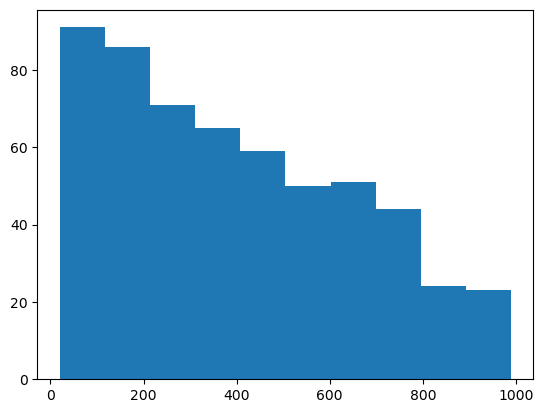

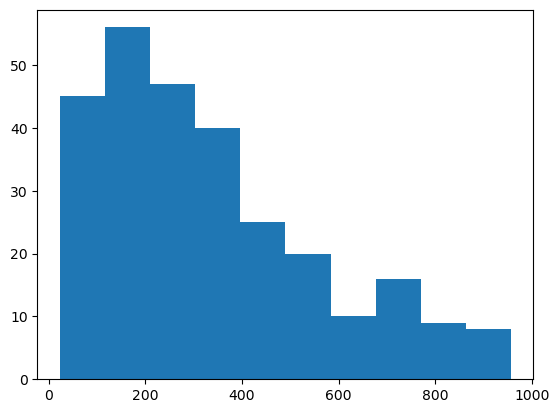

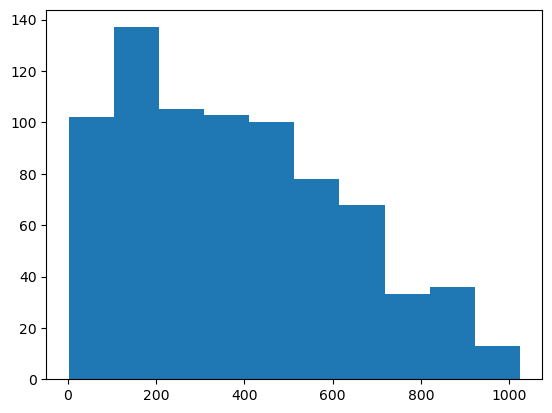

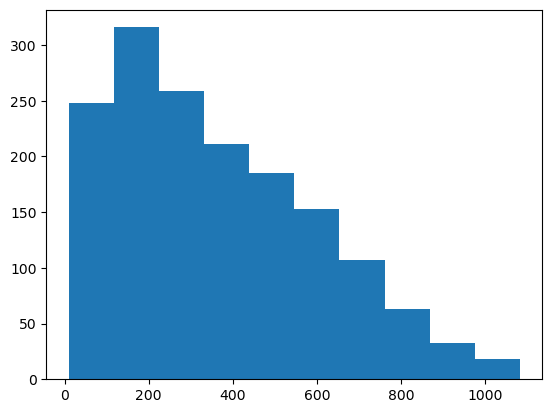

In [3]:
import matplotlib.pyplot as plt
m_distances = []

for m in mice:
    distances = []
    for mm, th in zip(mice[m], opt_th[m]):
        files_c = glob(root + mm + '.csv')
        files_x = glob(root + mm + '.xls')

        for f in files_x:
            df = pd.read_csv(f, sep = '\t') 
            dist = pdist(np.array([df['X'], df['Y'], df['Slice']*z_scale*th]).T)
            distances = [*distances, *dist]
   
        for f in files_c:
            df = pd.read_csv(f) 
            dist = pdist(np.array([df['X'], df['Y'], df['Slice']*z_scale*th]).T)
            distances = [*distances, *dist]            
    m_distances.append(distances) 
    
    if distances:
        print(m + f' min: {np.min(distances)} mean: {np.mean(distances)} median: {np.median(distances)}')
        plt.figure()
        plt.hist(distances)